In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import plotly.express as px

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (30,15)

In [4]:
saved_style_state = matplotlib.rcParams.copy()

In [5]:
pd.set_option('display.max_rows', None)

Dataset

In [6]:
ev = pd.read_csv("IEA-EV-data.csv")

ev.head(5)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.000000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.000000
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006479
3,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.000464
4,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.002785


In [7]:
country = pd.read_csv("countries.csv")

In [8]:
country_list =[]

for c in ev.region:
    if c not in country_list:
        country_list.append(c)

country_list.remove('World')
country_list.remove('Europe')
country_list.remove('Rest of the world')
country_list.remove('Other Europe')

length = len(country_list)

length



30

In [9]:
lat_long = country.loc[country['name'].isin(country_list)]

lat_long = lat_long.reindex(columns=['name', 'latitude', 'longitude'])

extra = {'name': ['United States', 'South Korea'], 'latitude': [37.090240, 37.532600], 'longitude': [-95.712891, 127.024612]}

df = pd.DataFrame(extra)

lat_long = (pd.concat([lat_long, df]))

lat_long = lat_long.reset_index()

lat_long = lat_long.drop('index', axis=1)

lat_long = lat_long.sort_values('name')

lat_long = lat_long.reset_index()

lat_long = lat_long.drop('index', axis=1)


In [10]:
df_geo = gpd.GeoDataFrame(lat_long, geometry = gpd.points_from_xy(lat_long.longitude, lat_long.latitude))

In [11]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Recorded Countries')

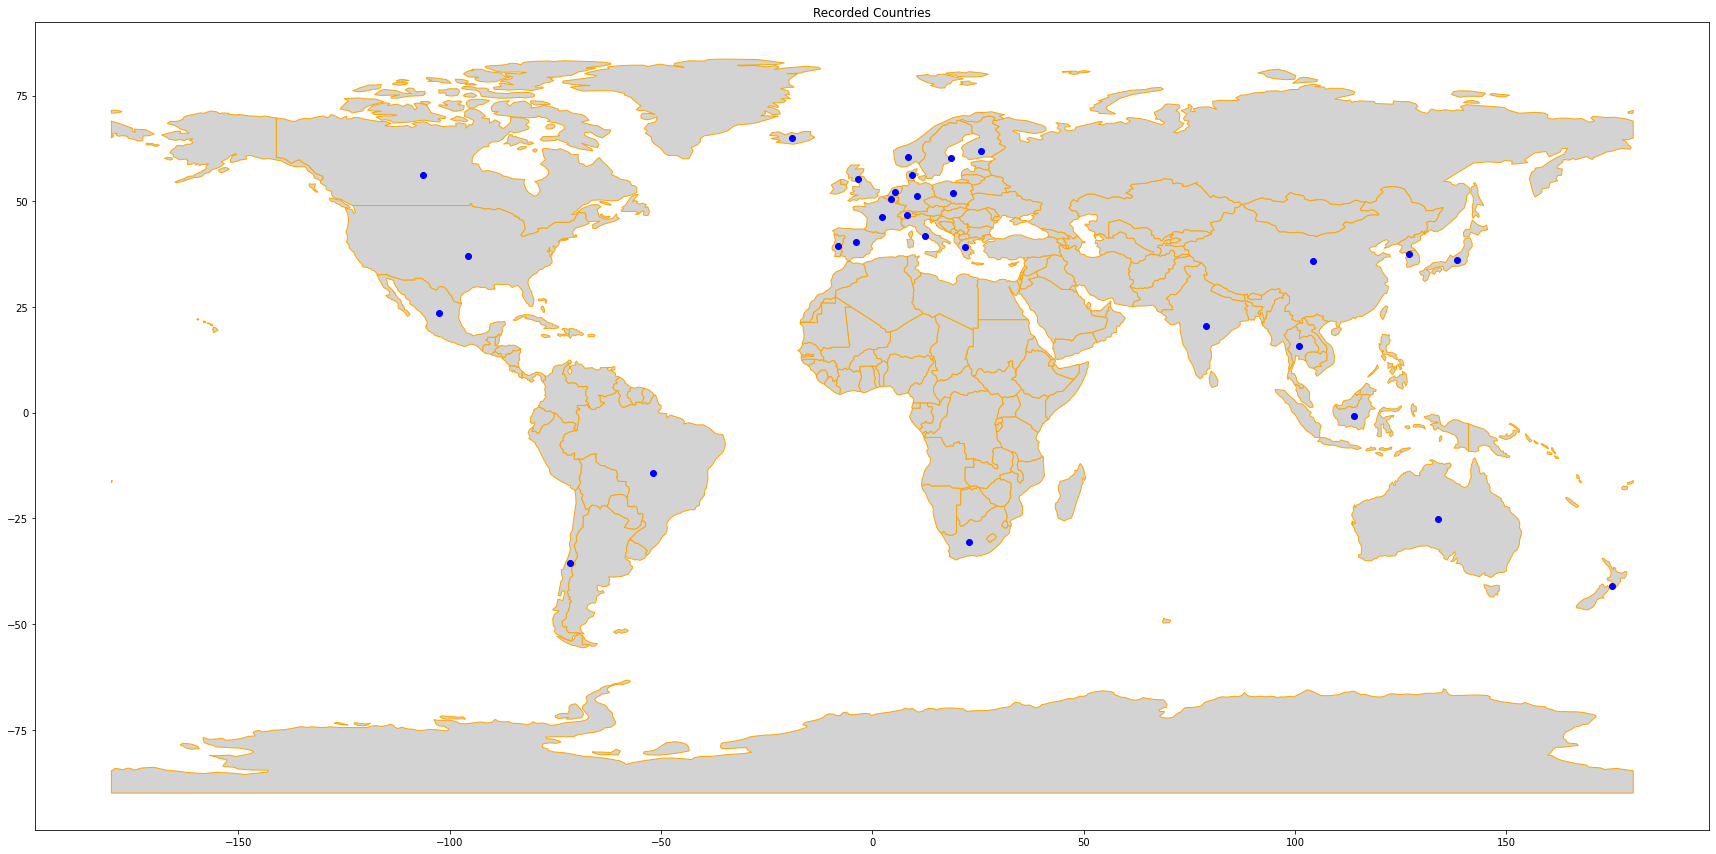

In [54]:
axis = world_data.plot(
    color = 'lightgrey', edgecolor = 'orange'
)

df_geo.plot(ax = axis, color = 'blue')

plt.title('Recorded Countries')

In [13]:
ev.parameter.value_counts()

EV stock                 1635
EV sales                 1522
EV stock share           1060
EV sales share           1023
EV charging points        623
Electricity demand        501
Oil displacement Mbd      326
Oil displacement Mlge     326
Name: parameter, dtype: int64

In [14]:
ev.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [55]:
def sales_share(country):
    share = ev[(ev.region != 'World') & (ev.category == 'Historical') & (ev['mode'] == 'Cars') & (ev.powertrain == 'PHEV') & (ev.unit == 'sales')]
    return share

In [16]:
def sales_phev(country):
    sales_information = ev[(ev.region != 'World') & (ev.region == country) & (ev.category == 'Historical') & (ev['mode'] == 'Cars') & (ev.powertrain == 'PHEV') & (ev.unit == 'sales')]
    return sales_information


In [17]:
def charging_data_fast(country):
    charging_information = ev[(ev.region == country) & (ev.category == 'Historical') & (ev.parameter == 'EV charging points') & (ev.powertrain == 'Publicly available fast')]
    return charging_information

In [18]:
def charging_data_slow(country):
    charging_information = ev[(ev.region == country) & (ev.category == 'Historical') & (ev.parameter == 'EV charging points') & (ev.powertrain == 'Publicly available slow')]
    return charging_information

In [19]:
aus_charge_fast = charging_data_fast('Australia')

nz_charge_fast = charging_data_fast('New Zealand')

aus_charge_fast


,region,category,parameter,mode,powertrain,year,unit,value
38,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.000000
43,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.093887
55,Australia,Historical,EV charging points,EV,Publicly available fast,2019,charging points,251.000000
59,Australia,Historical,EV charging points,EV,Publicly available fast,2020,charging points,350.000000
71,Australia,Historical,EV charging points,EV,Publicly available fast,2021,charging points,351.000000


In [20]:
aus_charge_slow = (charging_data_slow('Australia'))

nz_charge_slow = (charging_data_slow('New Zealand'))

aus_charge_slow

,region,category,parameter,mode,powertrain,year,unit,value
39,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,436.00000
44,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,665.92334
56,Australia,Historical,EV charging points,EV,Publicly available slow,2019,charging points,1679.00000
60,Australia,Historical,EV charging points,EV,Publicly available slow,2020,charging points,1950.00000
72,Australia,Historical,EV charging points,EV,Publicly available slow,2021,charging points,1951.00000


In [21]:
def get_int_list(dt):
    a = dt.value.astype(int)
    lst = list(a)
    return lst
    

In [22]:
aus_slow = get_int_list(aus_charge_slow)

aus_fast = get_int_list(aus_charge_fast)



In [23]:
nz_slow = get_int_list(nz_charge_slow)

nz_fast = get_int_list(nz_charge_fast)

In [24]:
def sum_index(list1, list2):
    sum_list = [sum(value) for value in zip(list1, list2)]
    return sum_list



In [25]:
aus_charging = sum_index(aus_slow, aus_fast)

nz_charging = sum_index(nz_slow, nz_fast)

nz_charging.insert(0, None)

aus_charging

[476, 726, 1930, 2300, 2302]

In [26]:
us_charging_fast = charging_data_fast('USA')
us_charging_slow = charging_data_slow('USA')

us_charging_slow


,region,category,parameter,mode,powertrain,year,unit,value
6327,USA,Historical,EV charging points,EV,Publicly available slow,2010,charging points,481.920349
6332,USA,Historical,EV charging points,EV,Publicly available slow,2011,charging points,3903.093018
6345,USA,Historical,EV charging points,EV,Publicly available slow,2012,charging points,11695.421875
6350,USA,Historical,EV charging points,EV,Publicly available slow,2013,charging points,14990.340820
6363,USA,Historical,EV charging points,EV,Publicly available slow,2014,charging points,20115.171875
6369,USA,Historical,EV charging points,EV,Publicly available slow,2015,charging points,28150.000000
6387,USA,Historical,EV charging points,EV,Publicly available slow,2016,charging points,35089.000000
6393,USA,Historical,EV charging points,EV,Publicly available slow,2017,charging points,39601.000000
6411,USA,Historical,EV charging points,EV,Publicly available slow,2018,charging points,50258.000000
6417,USA,Historical,EV charging points,EV,Publicly available slow,2019,charging points,64265.000000


In [27]:
us_fast = get_int_list(us_charging_fast)
us_slow = get_int_list(us_charging_slow)

del us_slow[:5]

us_slow


[28150, 35089, 39601, 50258, 64265, 82263, 91775]

In [28]:


add_aus_charging = aus_charging

add_aus_charging

[476, 726, 1930, 2300, 2302]

In [29]:
us_charging = sum_index(us_slow, us_fast)

us_charging

[31674, 38168, 43037, 54500, 77358, 98981, 113527]

Sales PHEV

In [30]:
def sales_phev(country):
    sales_information = ev[(ev.region != 'World') & (ev.category == 'Historical') & (ev['mode'] == 'Cars') & (ev.powertrain == 'PHEV') & (ev.unit == 'sales')]
    return sales_information

Sales BEV

In [60]:
def sales_bev(country):
    sales_information = ev[(ev.region == country) & (ev.category == 'Historical') & (ev['mode'] == 'Cars') & (ev.powertrain == 'BEV') & (ev.unit == 'sales')]
    return sales_information

In [59]:
for c in 

world = sales_bev('Australia')

world

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.0
9,Australia,Historical,EV sales,Cars,BEV,2012,sales,173.0
10,Australia,Historical,EV sales,Cars,BEV,2013,sales,191.0
21,Australia,Historical,EV sales,Cars,BEV,2014,sales,371.0
22,Australia,Historical,EV sales,Cars,BEV,2015,sales,759.0
33,Australia,Historical,EV sales,Cars,BEV,2016,sales,668.0
34,Australia,Historical,EV sales,Cars,BEV,2017,sales,1208.0
48,Australia,Historical,EV sales,Cars,BEV,2018,sales,1803.0
54,Australia,Historical,EV sales,Cars,BEV,2019,sales,6283.0
61,Australia,Historical,EV sales,Cars,BEV,2020,sales,5238.0


In [33]:
world_phev = sales_phev(ev)

world_phev.head(20)

,region,category,parameter,mode,powertrain,year,unit,value
7,Australia,Historical,EV sales,Cars,PHEV,2012,sales,80.0
12,Australia,Historical,EV sales,Cars,PHEV,2013,sales,102.0
19,Australia,Historical,EV sales,Cars,PHEV,2014,sales,951.0
24,Australia,Historical,EV sales,Cars,PHEV,2015,sales,1012.0
31,Australia,Historical,EV sales,Cars,PHEV,2016,sales,701.0
36,Australia,Historical,EV sales,Cars,PHEV,2017,sales,1076.0
46,Australia,Historical,EV sales,Cars,PHEV,2018,sales,1802.0
52,Australia,Historical,EV sales,Cars,PHEV,2019,sales,2877.0
63,Australia,Historical,EV sales,Cars,PHEV,2020,sales,1700.0
68,Australia,Historical,EV sales,Cars,PHEV,2021,sales,3400.0


In [34]:

world_sales = world.drop(["category", "parameter", "mode", "powertrain"], axis=1)

world_sales.head()

,region,year,unit,value
0,Australia,2011,sales,49.0
9,Australia,2012,sales,173.0
10,Australia,2013,sales,191.0
21,Australia,2014,sales,371.0
22,Australia,2015,sales,759.0


In [35]:
world_PHEV = world_phev.drop(["category", "parameter", "mode", "powertrain"], axis=1)

world_PHEV.head()

,region,year,unit,value
7,Australia,2012,sales,80.0
12,Australia,2013,sales,102.0
19,Australia,2014,sales,951.0
24,Australia,2015,sales,1012.0
31,Australia,2016,sales,701.0


In [36]:
def phev_selector(country):
    result = world_PHEV.loc[world_PHEV['region'] == country]
    
    result = list(result.value)

    result = list(map(int, result))
    
    return result


In [37]:

def selector(country):
    result = world_sales.loc[world_sales['region'] == country]
    
    result = list(result.value)

    result = list(map(int, result))
    
    return result


aus = selector('Australia')


aus.insert((0), None)

usa = selector('USA')

uk = selector('United Kingdom')

norway = selector('Norway')

germany = selector('Germany')

switzerland = selector('Switzerland')

sweden = selector('Sweden')

spain = selector('Spain')


        

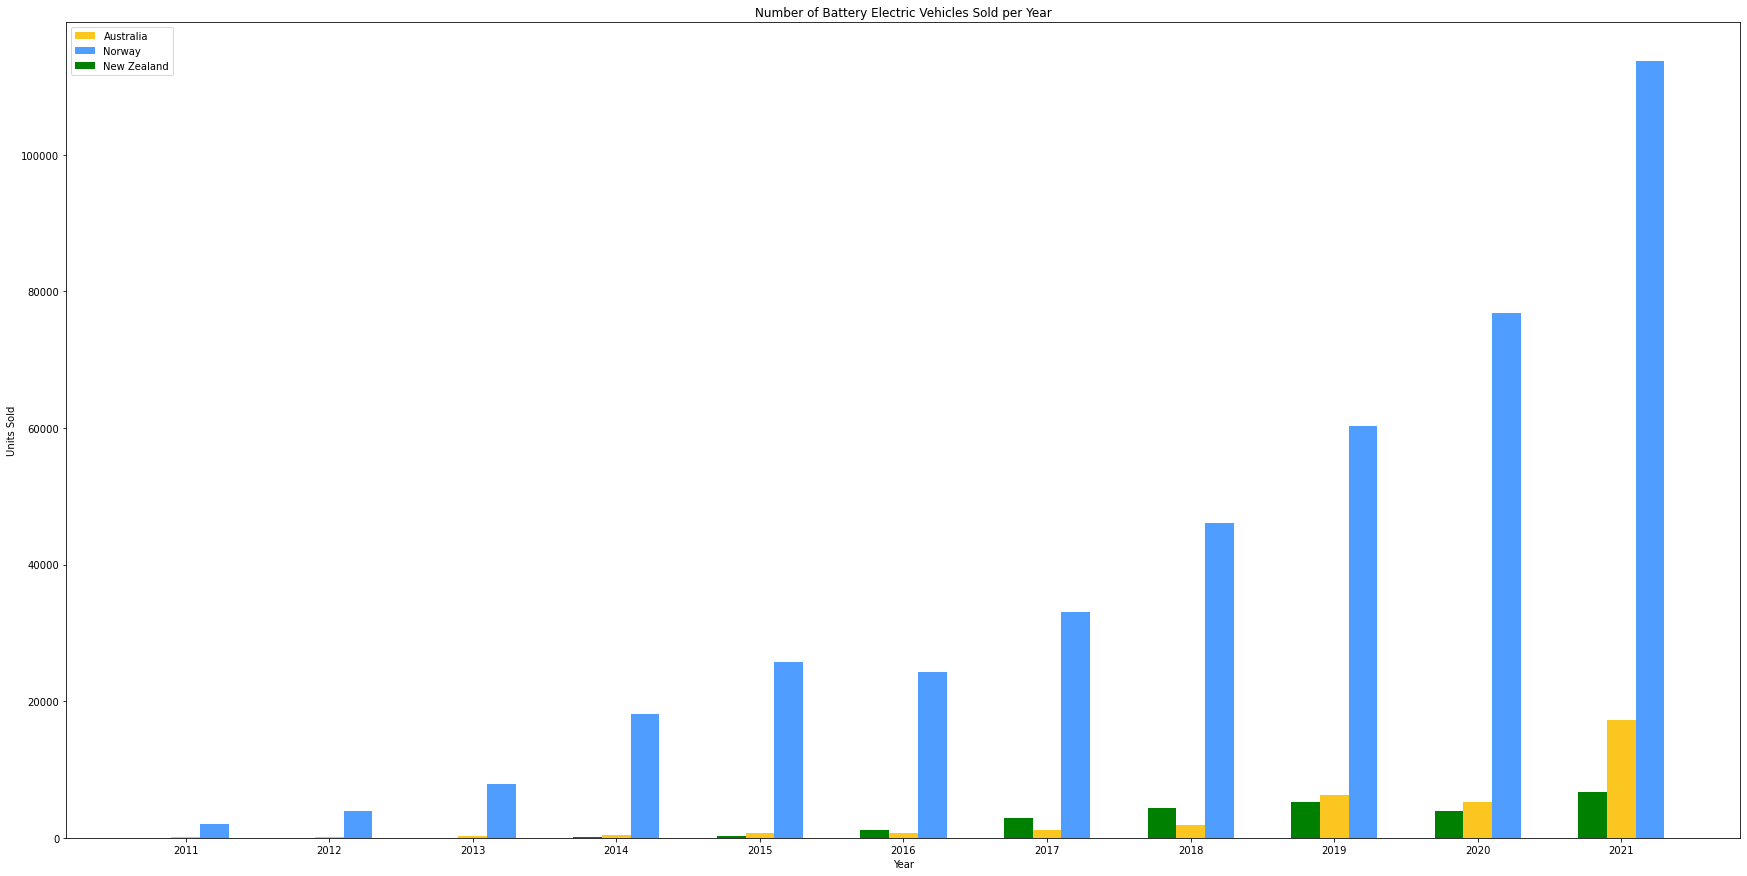

In [38]:
short_aus = selector('Australia')

#belg = selector('Belgium')

#belg.pop(0)

#short_belg = belg

nor = selector('Norway')

nor.pop(0)

short_nor = nor

nz = selector('New Zealand')

nz.pop(0)

short_nz = nz

x = list(range(2011,2022))

x_axis = np.arange(len(x))

plt.bar(x_axis, short_aus, 0.2, label='Australia', color='#fcc621')
plt.bar(x_axis +0.2, short_nor, 0.2, label='Norway', color='#4f9eff')
plt.bar(x_axis -0.2, short_nz, 0.2, label= 'New Zealand', color='g')

plt.xticks(x_axis, x)
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Number of Battery Electric Vehicles Sold per Year")
plt.legend()

plt.show()


In [39]:
year = list(range(2010,2022))

new_dataframe = pd.DataFrame(
    {
        "year": year,
        "Australia": aus,
        "USA": usa,
        "UK": uk,
        "Norway": norway,
        "Germany": germany,
        "Switzerland": switzerland,
        "Sweden": sweden,
        "Spain": spain,
        

    }
)

new_dataframe

,year,Australia,USA,UK,Norway,Germany,Switzerland,Sweden,Spain
0,2010,NaN,1191,255,355,144,137,4,76
1,2011,49.0,9750,1211,1996,1404,395,178,386
2,2012,173.0,14650,1705,3948,2214,342,266,427
3,2013,191.0,47690,2679,7885,5311,1156,432,811
4,2014,371.0,63420,6812,18091,8347,2688,1239,1405
5,2015,759.0,71044,10095,25779,12081,3257,2962,1342
6,2016,668.0,86731,10509,24222,11321,3295,2951,2005
7,2017,1208.0,104487,13550,33023,25065,4775,4359,3920
8,2018,1803.0,238823,15743,46091,36062,5138,7147,6003
9,2019,6283.0,241912,37972,60271,63281,13190,15795,10044


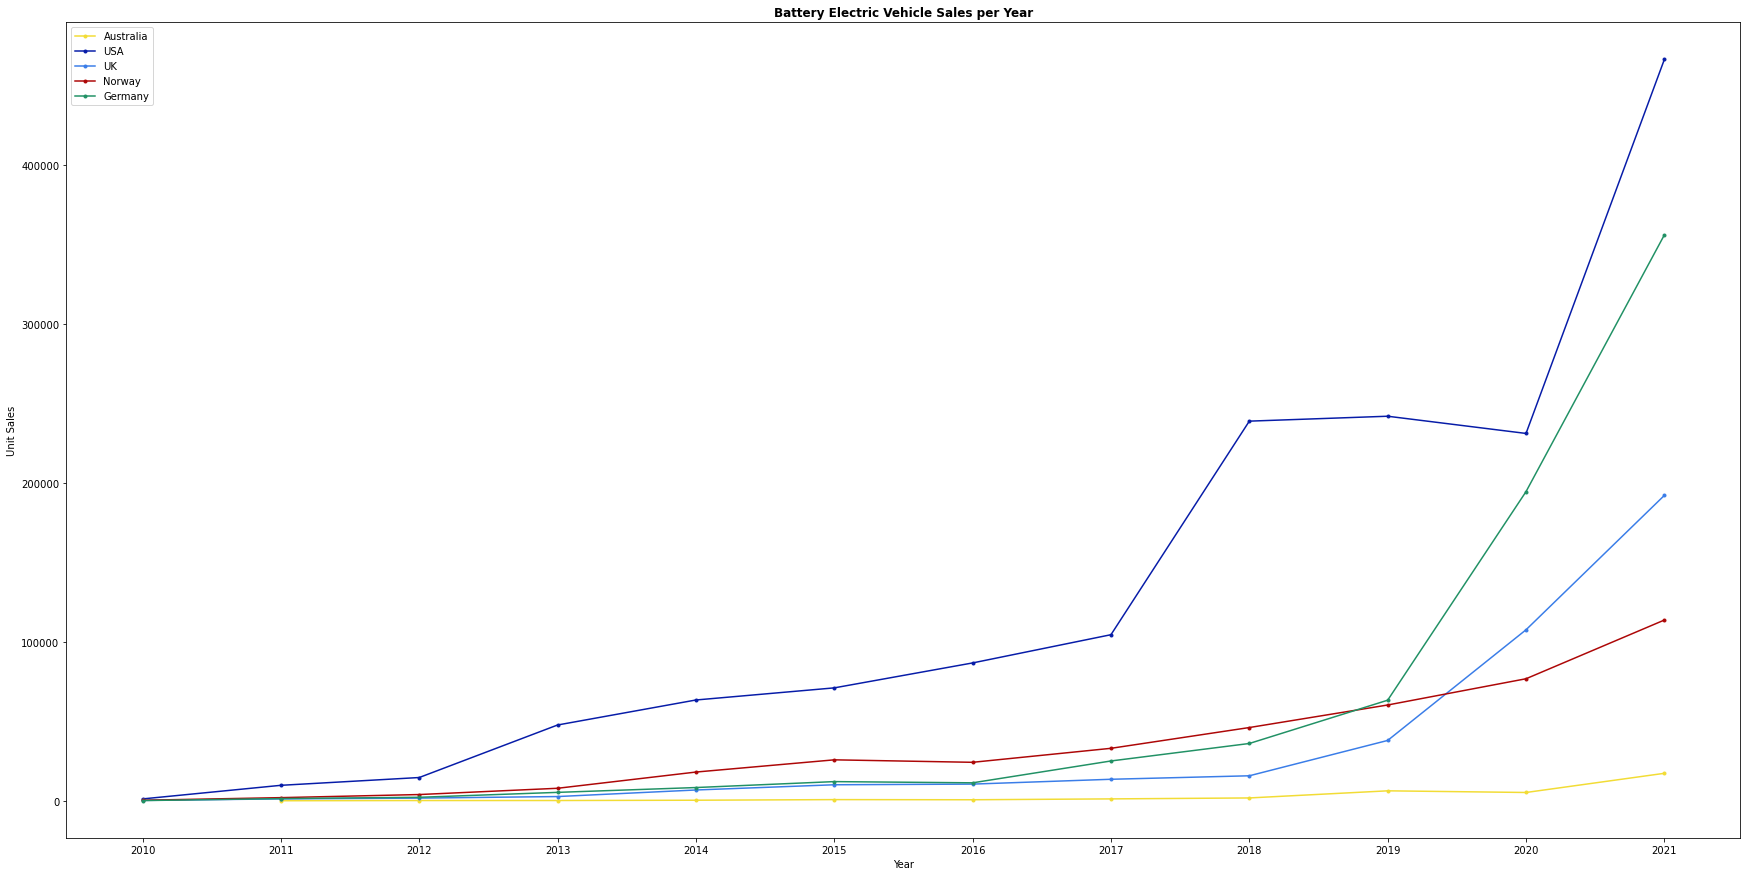

In [40]:
plt.title('Battery Electric Vehicle Sales per Year', fontdict={'fontweight': 'bold', 'fontsize': 12})

plt.plot(new_dataframe.year, new_dataframe.Australia, '.-', label='Australia', color='#f2dc35')
plt.plot(new_dataframe.year, new_dataframe.USA, '.-', label='USA', color='#071ca8')
plt.plot(new_dataframe.year, new_dataframe.UK, '.-', label='UK', color='#3a7de8')
plt.plot(new_dataframe.year, new_dataframe.Norway, '.-', label='Norway', color='#ad0707')
plt.plot(new_dataframe.year, new_dataframe.Germany, '.-', label='Germany', color='#219165')

plt.xticks(new_dataframe.year)


plt.xlabel('Year')
plt.ylabel('Unit Sales')

plt.legend()

plt.show()




In [41]:


aus_f = [x for x in aus if x is not None]

aus_f

aus_sales = sum(aus_f)

usa_sales = sum(usa)

uk_sales = sum(uk)

norway_sales = sum(norway)

aus



[None, 49, 173, 191, 371, 759, 668, 1208, 1803, 6283, 5238, 17300]

In [42]:
year = list(range(2010,2022))

all_sales = pd.DataFrame(
    {
        "Sales": ['Total'] + year,
        "Australia": [aus_sales] + aus,
        "USA": [usa_sales] + usa,
        "UK": [uk_sales] + uk,
        "Norway": [norway_sales] + norway
        #"Germany": germany,
        #"Switzerland": switzerland,
        #"Sweden": sweden,
        #"Spain": spain,
    }
)

all_sales

,Sales,Australia,USA,UK,Norway
0,Total,34043.0,1577114,400213,412155
1,2010,NaN,1191,255,355
2,2011,49.0,9750,1211,1996
3,2012,173.0,14650,1705,3948
4,2013,191.0,47690,2679,7885
5,2014,371.0,63420,6812,18091
6,2015,759.0,71044,10095,25779
7,2016,668.0,86731,10509,24222
8,2017,1208.0,104487,13550,33023
9,2018,1803.0,238823,15743,46091


In [43]:
countries = ['Australia', 'USA', 'UK', 'Norway']

c_totals = [aus_sales, usa_sales, uk_sales, norway_sales]


In [44]:
year = list(range(2010,2022))

sum_sales = pd.DataFrame(
    {
        "Country": countries,
        "Total BEV": c_totals,
        
      
        

    }
)

sum_sales

,Country,Total BEV
0,Australia,34043
1,USA,1577114
2,UK,400213
3,Norway,412155


PHEV

In [45]:

world_PHEV = world_phev.drop(["category", "parameter", "mode", "powertrain"], axis=1)

world_PHEV.head(10)

,region,year,unit,value
7,Australia,2012,sales,80.0
12,Australia,2013,sales,102.0
19,Australia,2014,sales,951.0
24,Australia,2015,sales,1012.0
31,Australia,2016,sales,701.0
36,Australia,2017,sales,1076.0
46,Australia,2018,sales,1802.0
52,Australia,2019,sales,2877.0
63,Australia,2020,sales,1700.0
68,Australia,2021,sales,3400.0


In [46]:

def selector_phev(country):
    result = world_PHEV.loc[world_PHEV['region'] == country]
    
    result = list(result.value)

    result = list(map(int, result))
    
    return result


aus_phev = selector_phev('Australia')

usa_phev = selector_phev('USA')

uk_phev = selector_phev('United Kingdom')

norway_phev = selector_phev('Norway')

germany_phev = selector_phev('Germany')

switzerland_phev = selector_phev('Switzerland')

sweden_phev = selector_phev('Sweden')

spain_phev = selector_phev('Spain')

aus_phev





[80, 102, 951, 1012, 701, 1076, 1802, 2877, 1700, 3400]

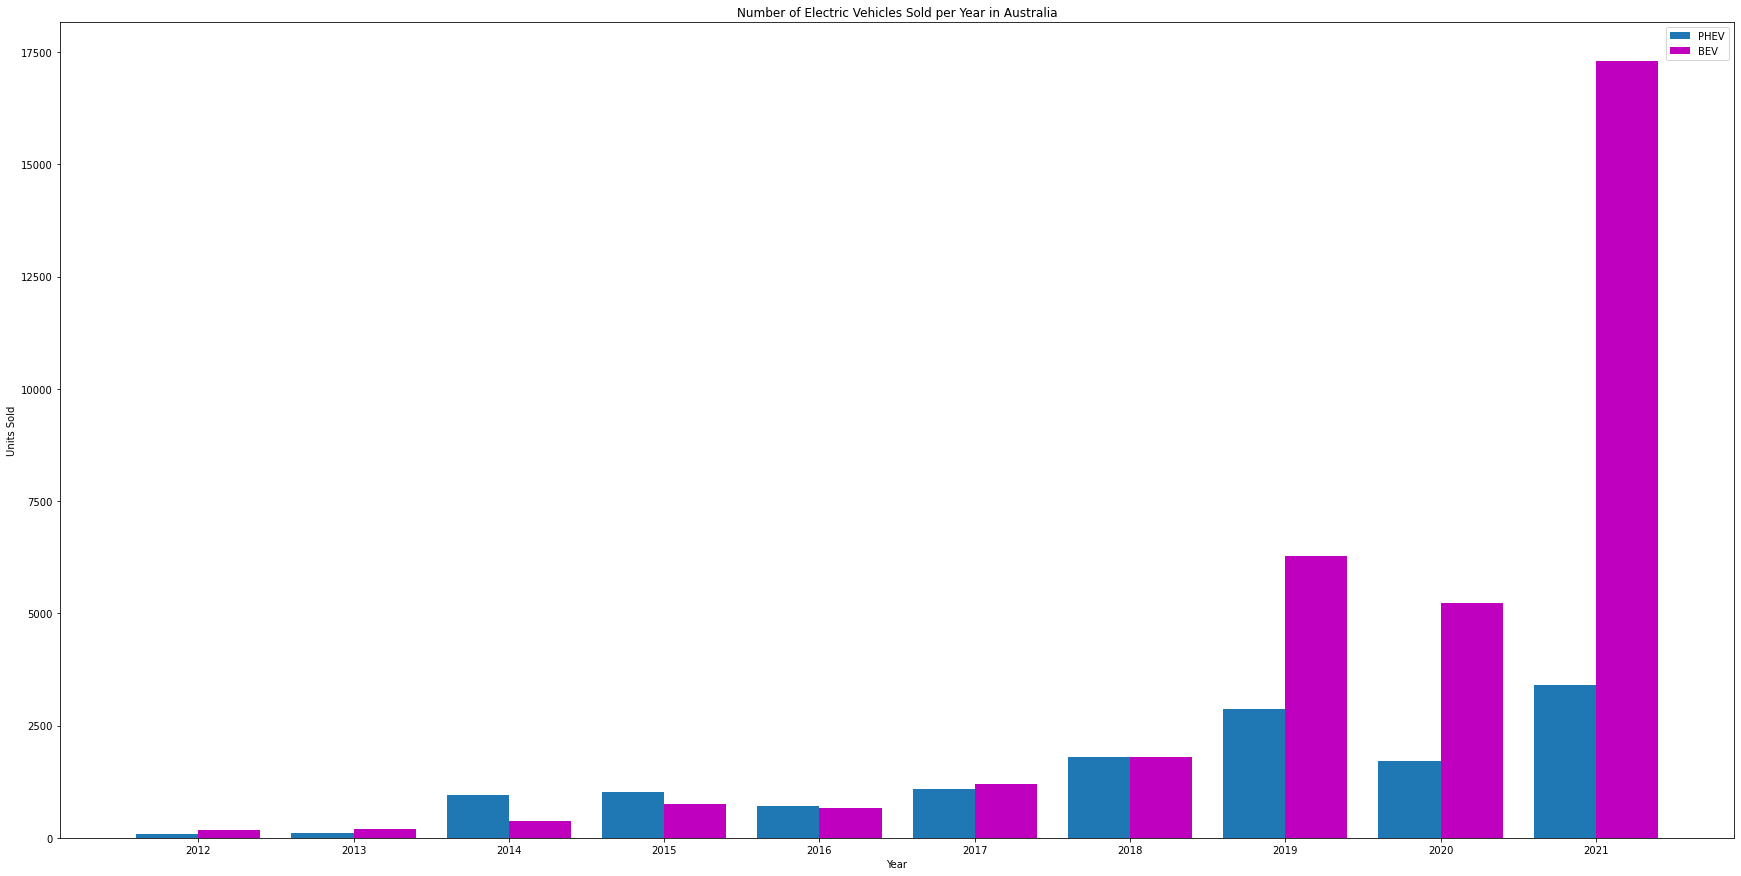

In [47]:

au = selector('Australia')

au.pop(0)

new_a = au

x = list(range(2012,2022))

x_axis = np.arange(len(x))

plt.bar(x_axis -0.2, aus_phev, 0.4, label='PHEV')
plt.bar(x_axis +0.2, au, 0.4, label='BEV', color='m')


plt.xticks(x_axis, x)
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Number of Electric Vehicles Sold per Year in Australia")
plt.legend()

plt.show()



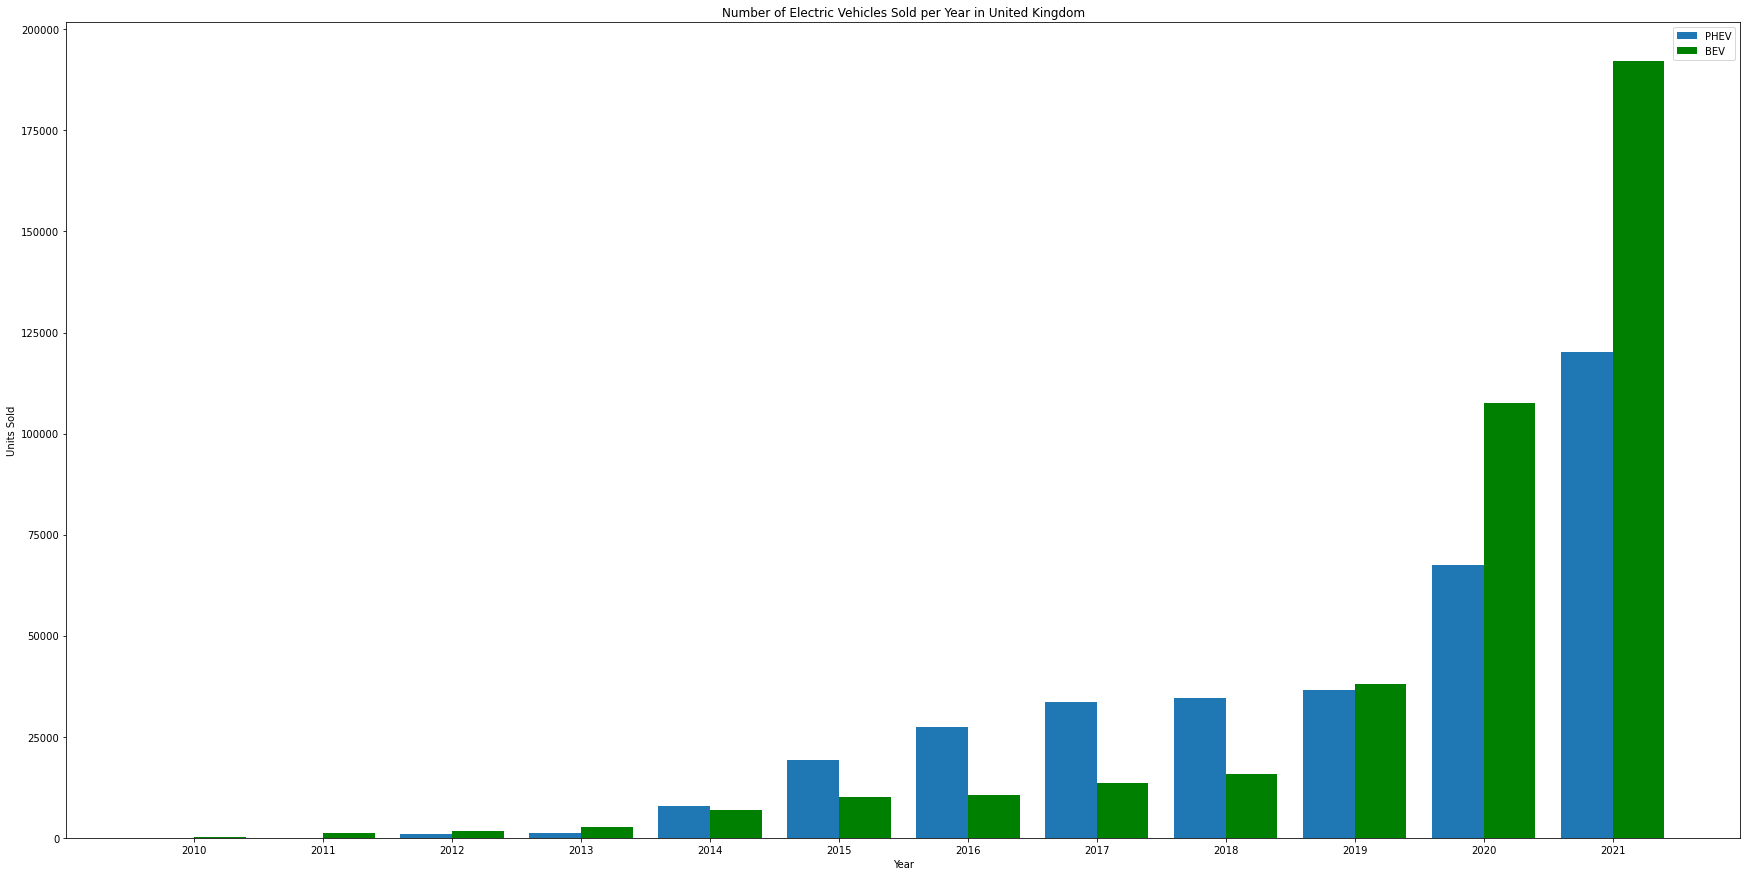

In [48]:
kingdom = selector('United Kingdom')

king_phev = phev_selector('United Kingdom')

x = list(range(2010,2022))

x_axis = np.arange(len(x))

plt.bar(x_axis -0.2, king_phev, 0.4, label='PHEV')
plt.bar(x_axis +0.2, kingdom, 0.4, label='BEV', color='g')


plt.xticks(x_axis, x)
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Number of Electric Vehicles Sold per Year in United Kingdom")
plt.legend()

plt.show()



In [49]:
phev_sum_aus = sum(aus_phev)

phev_sum_usa = sum(usa_phev)

phev_sum_uk = sum(uk_phev)

In [50]:
countries = ['Australia', 'USA', 'UK']

c_totals = [aus_sales, usa_sales, uk_sales]

p_totals = [phev_sum_aus, phev_sum_usa, phev_sum_uk]

In [51]:
year = list(range(2010,2022))

sum_sales = pd.DataFrame(
    {
        "Country": countries,
        "BEV": c_totals,
        "PHEV": p_totals
        
      
        

    }
)

sum_sales

,Country,BEV,PHEV
0,Australia,34043,13701
1,USA,1577114,796871
2,UK,400213,349244
